In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import git
import pandas as pd
import matplotlib.pyplot as plt
repo = git.Repo("./", search_parent_directories=True)
homedir = repo.working_dir
datadir = f"{homedir}/data/"
df_cases = pd.read_csv(datadir + 'us/covid/confirmed_cases.csv')
df_deaths = pd.read_csv(datadir + 'us/covid/deaths.csv')

In [5]:
from scipy.special import erf
from scipy.optimize import least_squares

# Erf regression

In [156]:
def model(t, params):
    return params[0] * (1+erf(params[1]*(t-params[2])))

In [258]:
def residual(params, window):
    return model(t_vec[:-window], params)-data[t_vec[:-window]]

In [ ]:
df_deaths = df_deaths.set_index('countyFIPS')

In [86]:
df_deaths.sort_values(by='5/3/20',ascending=False).head(20)

,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20
countyFIPS,,,,,,,,,,,,,,,,,,,,,
36047,Kings County,NY,36,0,0,0,0,0,0,0,...,4793,4978,5075,5164,5281,5332,5390,5446,5542,5632
36081,Queens County,NY,36,0,0,0,0,0,0,0,...,4571,4723,4800,4870,4983,5070,5150,5204,5279,5385
36005,Bronx County,NY,36,0,0,0,0,0,0,0,...,3075,3171,3216,3285,3357,3400,3435,3457,3538,3607
36061,New York County,NY,36,0,0,0,0,0,0,0,...,1834,1952,1973,1999,2035,2060,2100,2132,2174,2205
26163,Wayne County,MI,26,0,0,0,0,0,0,0,...,1443,1560,1580,1622,1682,1727,1782,1802,1884,1893
17031,Cook County,IL,17,0,0,0,0,0,0,0,...,1220,1267,1313,1347,1457,1516,1607,1673,1743,1786
36059,Nassau County,NY,36,0,0,0,0,0,0,0,...,1518,1558,1587,1620,1647,1678,1700,1720,1745,1770
1,New York City Unallocated/Probable,NY,36,0,0,0,0,0,0,0,...,1702,1634,1555,1523,1561,1520,1491,1445,1236,1359
34013,Essex County,NJ,34,0,0,0,0,0,0,0,...,975,1019,1023,1028,1090,1139,1186,1240,1265,1282


In [129]:
model(t_vec, guesses)

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0., 2500., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000.])

In [99]:
data = df_deaths.loc[36081,'1/22/20':].astype(int).values

In [531]:
t_vec = np.array(list(range(len(data))))

In [248]:
guesses = np.array([2500, 0.1, 70])

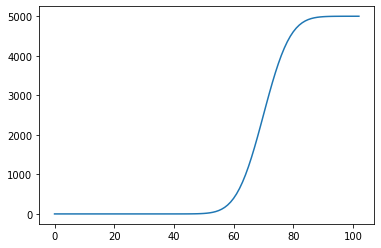

In [249]:
plt.plot(model(t_train, guesses))

In [498]:
res = least_squares(residual, x0=guesses, args=(14, ))

In [469]:
res.x

array([8.25561133e+02, 1.00337817e-01, 7.43814888e+01])

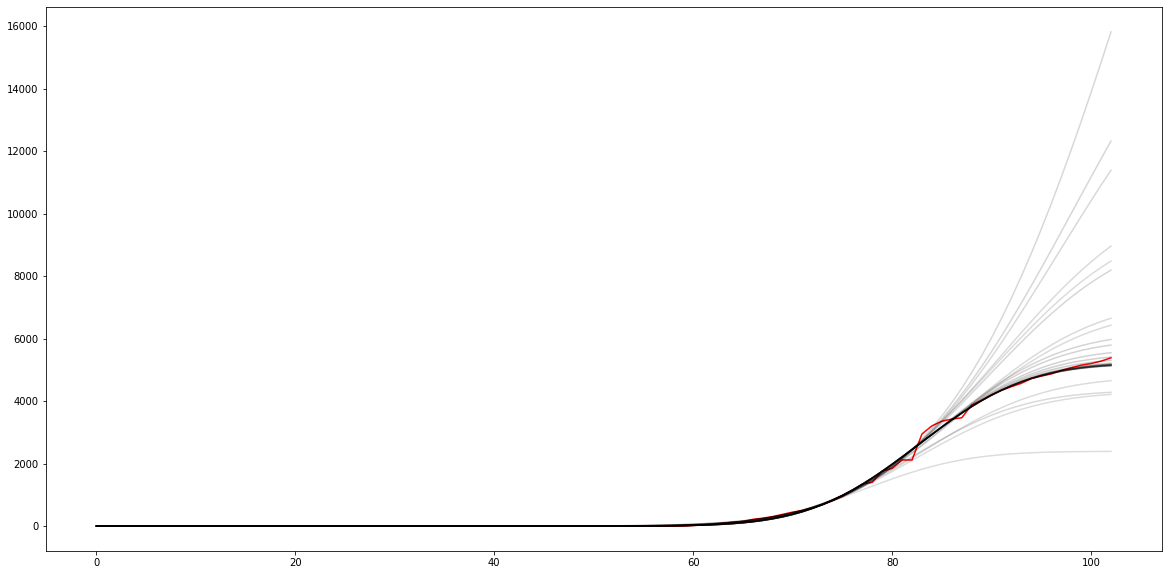

In [285]:
plt.figure(figsize=(20,10))
plt.plot(data, c='r')
for w in range(3, 28, 1):
    res = least_squares(residual, x0=guesses, args=(w, ))
    plt.plot(model(t_max, res.x), c='k', alpha=1/w+.1)
plt.show()

# Gaussian Process

In [3]:
import pymc3 as pm
import arviz as az

/home/tzuchen/PycharmProjects/SKTW/venv/lib64/python3.8/site-packages/theano/gof/op.py:1543: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  define_macros.append("#define INPUT_%d %s" (i, inp))
/home/tzuchen/PycharmProjects/SKTW/venv/lib64/python3.8/site-packages/theano/gof/op.py:1547: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  define_macros.append("#define OUTPUT_%d %s" (i, inp))
/home/tzuchen/PycharmProjects/SKTW/venv/lib64/python3.8/site-packages/theano/gof/opt.py:1287: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if len(tracks) is 0:
/home/tzuchen/PycharmProjects/SKTW/venv/lib64/python3.8/site-packages/theano/compile/mode.py:264: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if optimizer is 'default':
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/home/tzuchen/PycharmProjects/SKTW/venv/lib64/python3.8/site-packages/theano/tensor/nnet/bn.py:645: SyntaxWarning:

In [470]:
means=[8.25561133e+02, 1.00337817e-01, 7.43814888e+01]

In [471]:
with pm.Model() as erf_model:
    
    β = pm.Normal('β', mu=means[0], sigma=means[0]/10)
    γ = pm.Normal('γ', mu=means[1], sigma=means[1]/10)
    t_int = pm.Normal('t0', mu=means[2], sigma=means[2]/10)
    σ = pm.HalfNormal('σ', sigma=10)
    μ = β * (1 + pm.math.erf(γ * (t_vec[:-28] - t_int)))
    
    positive = pm.Normal('positive', mu=μ, sigma=σ, observed=data[:-28])


In [472]:
with erf_model:
    trace = pm.sample(1000, tune=2000, cores=8)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [σ, t0, γ, β]
Sampling 8 chains, 1 divergences: 100%|██████████| 24000/24000 [00:13<00:00, 1718.55draws/s]
The acceptance probability does not match the target. It is 0.6905376678773366, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


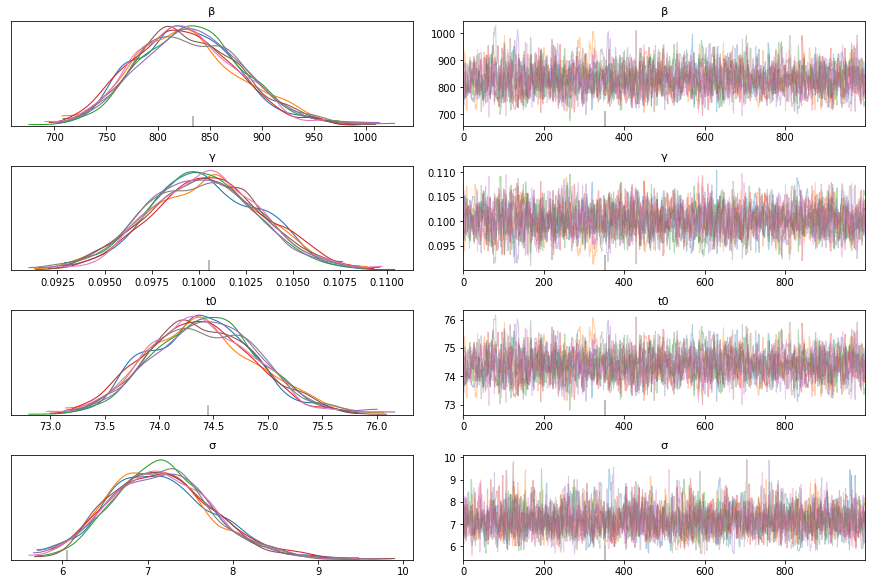

In [473]:
az.plot_trace(trace);

In [377]:
trace

<MultiTrace: 8 chains, 1000 iterations, 5 variables>

<Figure size 1440x720 with 0 Axes>

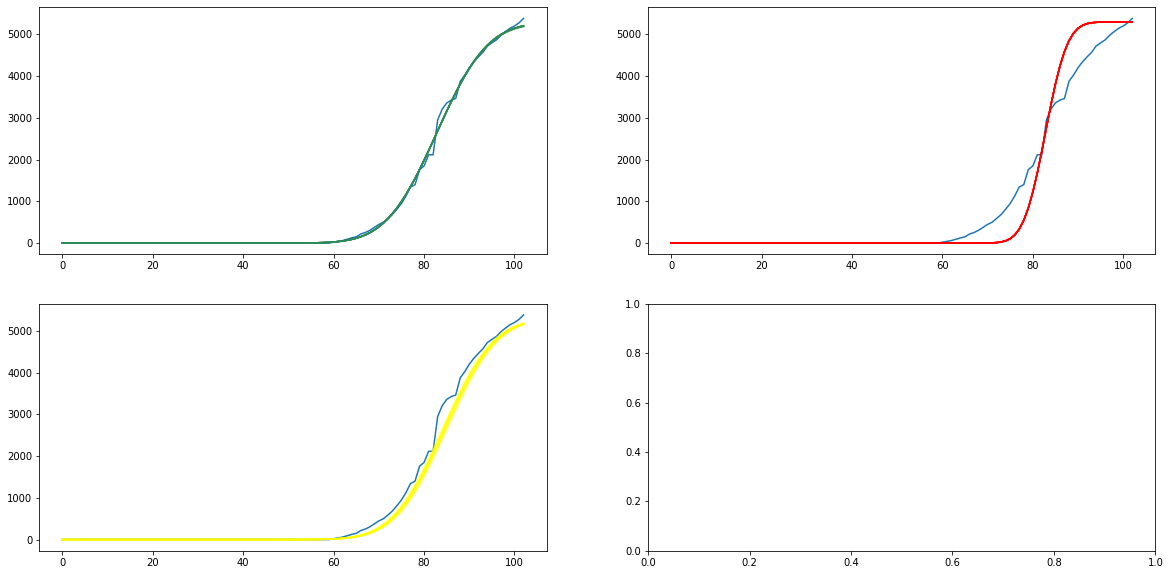

In [390]:
plt.figure(figsize=(20,10))
fig, axs = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(20)
axs[0, 0].plot(t_vec, data)
for beta in trace['β'][:20]:
    axs[0, 0].plot(t_vec, beta * (1 + erf(means[1] * (np.array(t_vec) - means[2]))), alpha=0.3, color='seagreen')
axs[0, 1].plot(t_vec, data)
for gamma in trace['γ'][:20]:
    axs[0, 1].plot(t_vec, means[0] * (1 + erf(gamma * (np.array(t_vec) - means[2]))), alpha=0.3, color='red')
axs[1, 0].plot(t_vec, data)
for t_int in trace['t0'][:20]:
    axs[1, 0].plot(t_vec, means[0] * (1 + erf(means[1] * (np.array(t_vec) - t_int))), alpha=0.3, color='yellow')
plt.show()

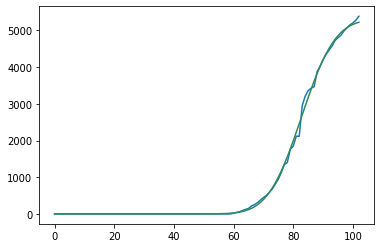

In [394]:
plt.plot(t_vec, data)
plt.plot(t_vec, means[0] * (1 + erf(means[1] * (np.array(t_vec) - means[2]))), color='seagreen')

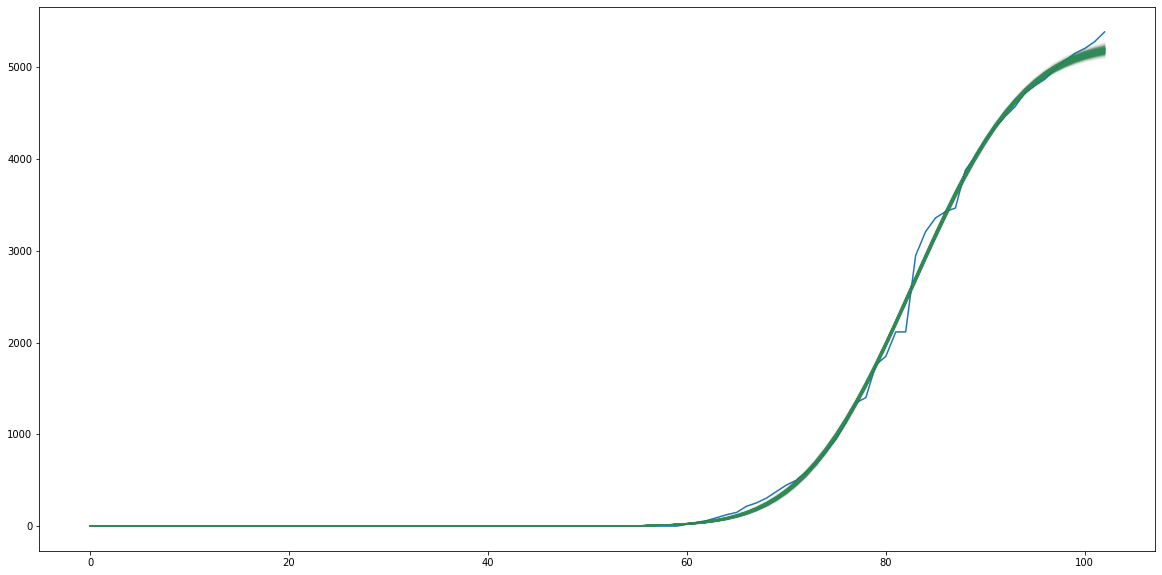

In [467]:
plt.figure(figsize=(20,10))
plt.plot(t_vec, data)
# ax.set_ylim(0, None)
for t in trace:
    plt.plot(t_vec, t['β'] * (1 + erf(t['γ'] * (np.array(t_vec) - t['t0']))), alpha=0.008, color='seagreen')
plt.savefig("1day.png")

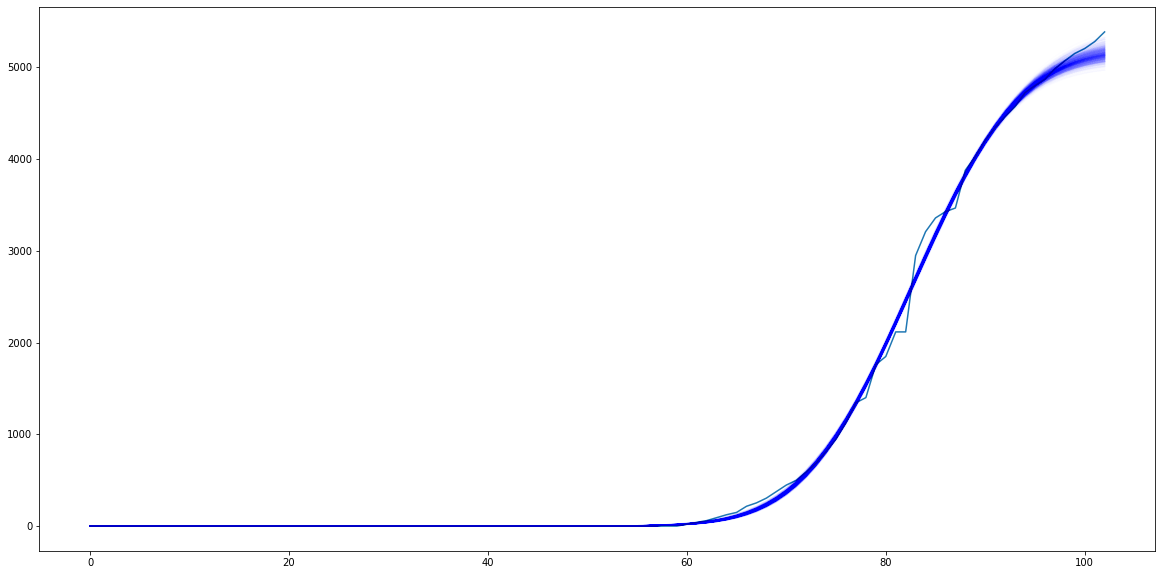

In [456]:
plt.figure(figsize=(20,10))
plt.plot(t_vec, data)
# ax.set_ylim(0, None)
for t in trace:
    plt.plot(t_vec, t['β'] * (1 + erf(t['γ'] * (np.array(t_vec) - t['t0']))), alpha=0.008, color='blue')
plt.savefig("1week.png")

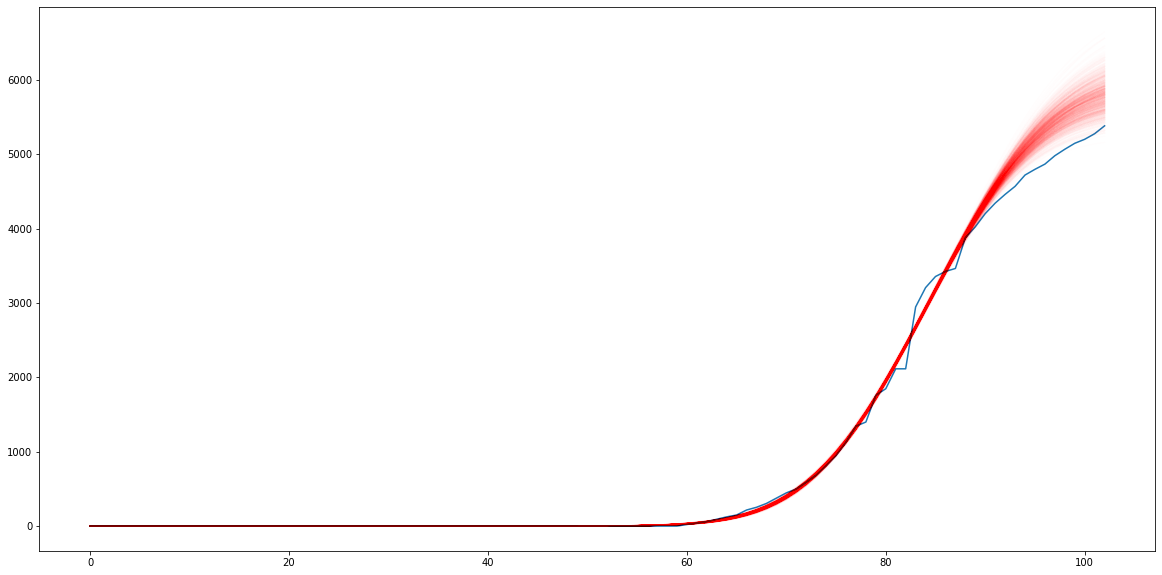

In [447]:
plt.figure(figsize=(20,10))
plt.plot(t_vec, data)
# ax.set_ylim(0, None)
for t in trace:
    plt.plot(t_vec, t['β'] * (1 + erf(t['γ'] * (np.array(t_vec) - t['t0']))), alpha=0.008, color='red')
plt.savefig("2weeks.png")

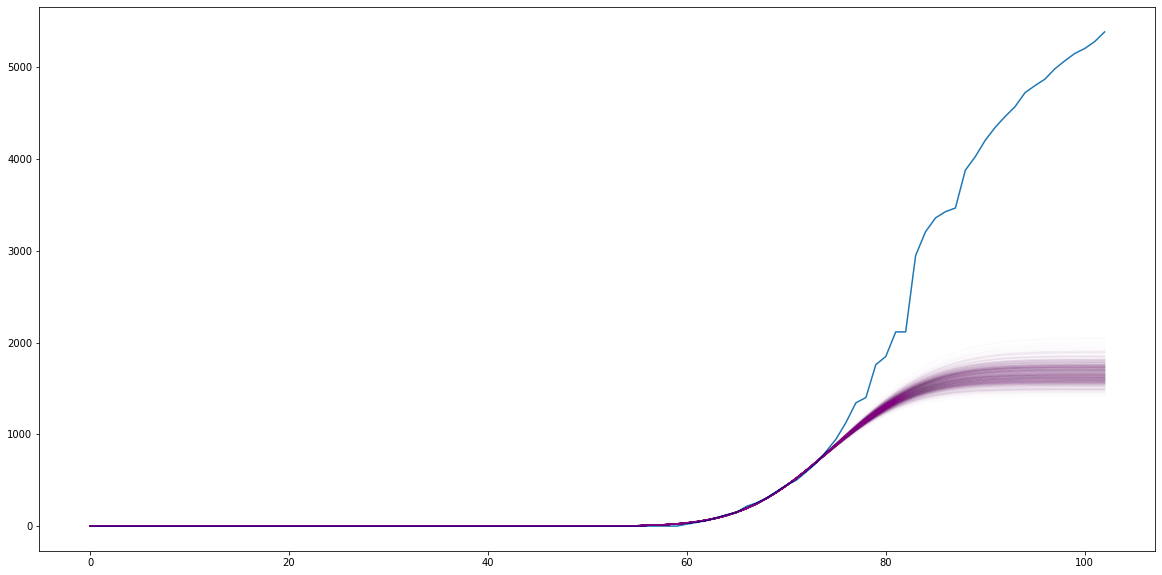

In [475]:
plt.figure(figsize=(20,10))
plt.plot(t_vec, data)
# ax.set_ylim(0, None)
for t in trace:
    plt.plot(t_vec, t['β'] * (1 + erf(t['γ'] * (np.array(t_vec) - t['t0']))), alpha=0.008, color='purple')
plt.savefig("1month.png")

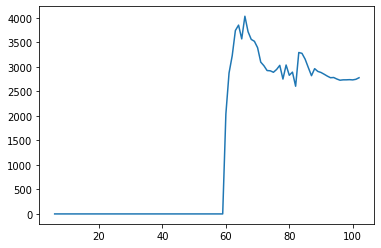

In [499]:
plt.plot((data/(1+erf(res.x[1]*(t_vec-res.x[2]
                               )
                     )
               )
         )
        )

In [533]:
with pm.Model() as gp_model:

    # Lengthscale
    ρ = pm.HalfCauchy('ρ', 5)
    η = pm.HalfCauchy('η', 5)
    
    M = pm.gp.mean.Linear(coeffs=0)
    K = (η**2) * pm.gp.cov.ExpQuad(1, ρ) 
    β = pm.Normal('β', mu=means[0], sigma=means[0]/10)
    γ = pm.Normal('γ', mu=means[1], sigma=means[1]/10)
    t_int = pm.Normal('t0', mu=means[2], sigma=means[2]/10)
    # σ = pm.HalfNormal('σ', 50)
    
    # covid_gp = pm.gp.Marginal(mean_func=M, cov_func=K)
    # covid_gp.marginal_likelihood('deaths', X=t_vec.reshape(-1,1), y=data, noise=σ)
    gp = pm.gp.Latent(mean_func=M, cov_func=K)
    f = gp.prior("f", X=β * (1 + pm.math.erf(γ * (t_vec.reshape(-1,1) - t_int))), observed=data)

TypeError: Cannot infer 'shape', provide as an argument

In [526]:
with gp_model:
    gp_trace = pm.sample(1000, tune=2000, cores=8, random_seed=42)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [t0, γ, β, η, ρ]
Sampling 8 chains, 0 divergences:  12%|█▎        | 3000/24000 [00:05<00:39, 533.13draws/s]


LinAlgError: 78-th leading minor of the array is not positive definite
Apply node that caused the error: Cholesky{lower=True, destructive=False, on_error='raise'}(Elemwise{Composite{((exp((i0 * clip((i1 + i2 + i3), i4, i5))) * i6) + i7)}}[(0, 1)].0)
Toposort index: 19
Inputs types: [TensorType(float64, matrix)]
Inputs shapes: [(103, 103)]
Inputs strides: [(824, 8)]
Inputs values: ['not shown']
Outputs clients: [[Gemv{inplace}(AllocEmpty{dtype='float64'}.0, TensorConstant{1.0}, Cholesky{lower=True, destructive=False, on_error='raise'}.0, TensorConstant{[   0.    ..79. 5385.]}, TensorConstant{0.0})]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "/home/tzuchen/PycharmProjects/SKTW/venv/lib64/python3.8/site-packages/IPython/core/interactiveshell.py", line 2886, in _run_cell
    return runner(coro)
  File "/home/tzuchen/PycharmProjects/SKTW/venv/lib64/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/tzuchen/PycharmProjects/SKTW/venv/lib64/python3.8/site-packages/IPython/core/interactiveshell.py", line 3062, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/home/tzuchen/PycharmProjects/SKTW/venv/lib64/python3.8/site-packages/IPython/core/interactiveshell.py", line 3254, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/tzuchen/PycharmProjects/SKTW/venv/lib64/python3.8/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-525-473bc5e7c746>", line 17, in <module>
    f = gp.prior("f", X=t_vec.reshape(-1,1), observed=data)
  File "/home/tzuchen/PycharmProjects/SKTW/venv/lib64/python3.8/site-packages/pymc3/gp/gp.py", line 145, in prior
    f = self._build_prior(name, X, reparameterize, **kwargs)
  File "/home/tzuchen/PycharmProjects/SKTW/venv/lib64/python3.8/site-packages/pymc3/gp/gp.py", line 115, in _build_prior
    f = pm.Deterministic(name, mu + cholesky(cov).dot(v))

HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

/home/tzuchen/PycharmProjects/SKTW/venv/lib64/python3.8/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


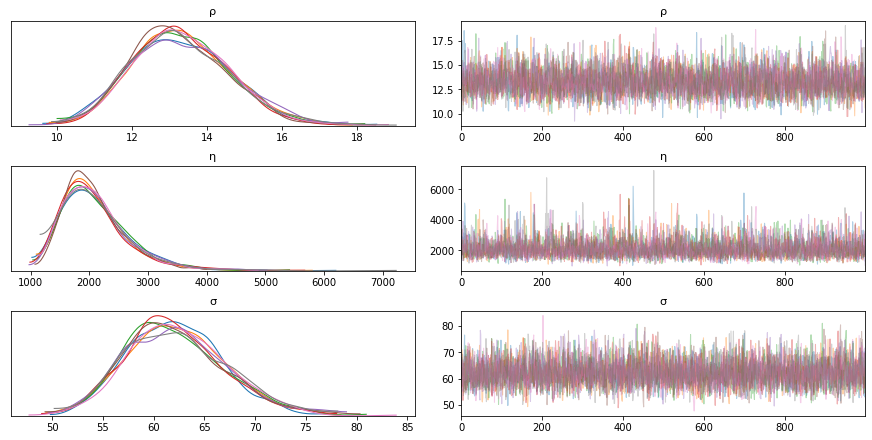

In [514]:
az.plot_trace(gp_trace, var_names=['ρ', 'η', 'σ']);

In [518]:
with gp_model:
    pred = covid_gp.conditional("pred", t_vec.reshape(-1, 1))
    gp_samples = pm.sample_posterior_predictive(gp_trace, vars=[pred], samples=300, random_seed=42)

/home/tzuchen/PycharmProjects/SKTW/venv/lib64/python3.8/site-packages/pymc3/sampling.py:1246: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(
  0%|          | 1/300 [00:00<00:49,  6.07it/s]/home/tzuchen/PycharmProjects/SKTW/venv/lib64/python3.8/site-packages/scipy/stats/_multivariate.py:660: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)
100%|██████████| 300/300 [00:03<00:00, 88.57it/s]


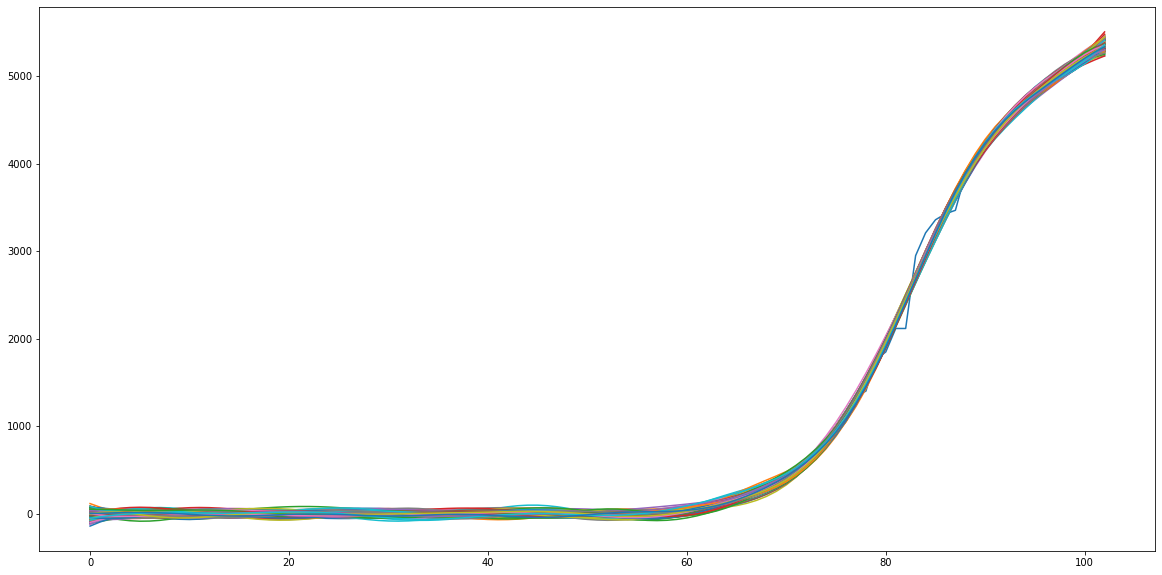

In [520]:
plt.figure(figsize=(20,10))
plt.plot(t_vec, data)
for x in gp_samples['pred']:
    plt.plot(t_vec, x);
plt.show()